In [117]:
from analysis import get_track_durations_stdev_distribution
from analysis import get_artist_diversity_distribution
from pre_processing import read_pre_processed_data
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import ast
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from dotenv import load_dotenv
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


In [119]:
playlist_df, tracks_df, playlist_tracks_df = read_pre_processed_data('../data')

In [120]:
playlist_tracks_df.head()

,track_id,pid
0,0,549000
1,1,549000
2,2,549000
3,3,549000
4,4,549000


In [121]:
playlist_df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,num_artists,duration_s
0,Bob Dylan,False,549000,1454803200,75,65,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",28,39,18425
1,ON THE RUN,False,549001,1419552000,61,30,1,"[75, 76, 77, 78, 79, 11, 80, 81, 82, 83, 84, 8...",4,5,15224
2,Biking,False,549002,1435708800,144,117,1,"[135, 136, 137, 138, 139, 140, 141, 142, 143, ...",12,72,32723
3,August,False,549003,1505001600,38,32,1,"[279, 280, 281, 282, 283, 284, 285, 286, 287, ...",20,33,8439
4,run mix,False,549004,1459555200,16,15,1,"[317, 318, 93, 319, 320, 79, 321, 322, 323, 32...",3,12,3804


In [122]:
tracks_df.head()

,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,duration_s,track_id
0,Bob Dylan,spotify:track:6QHYEZlm9wyfXfEM1vSu1P,spotify:artist:74ASZWbe4lXaubB36ztrGX,Boots of Spanish Leather,spotify:album:7DZeLXvr9eTVpyI1OlqtcS,The Times They Are A-Changin',277,0
1,Bob Dylan,spotify:track:3RkQ3UwOyPqpIiIvGVewuU,spotify:artist:74ASZWbe4lXaubB36ztrGX,Mr. Tambourine Man,spotify:album:1lPoRKSgZHQAYXxzBsOQ7v,Bringing It All Back Home,330,1
2,Loggins & Messina,spotify:track:0ju1jP0cSPJ8tmojYBEI89,spotify:artist:7emRV8AluG3d4e5T0DZiK9,Danny's Song,spotify:album:5BWgJaesMjpJWCTU9sgUPf,The Best: Loggins & Messina Sittin' In Again,254,2
3,Bob Dylan,spotify:track:7ny2ATvjtKszCpLpfsGnVQ,spotify:artist:74ASZWbe4lXaubB36ztrGX,A Hard Rain's A-Gonna Fall,spotify:album:0o1uFxZ1VTviqvNaYkTJek,The Freewheelin' Bob Dylan,412,3
4,Bob Dylan,spotify:track:18GiV1BaXzPVYpp9rmOg0E,spotify:artist:74ASZWbe4lXaubB36ztrGX,Blowin' In the Wind,spotify:album:0o1uFxZ1VTviqvNaYkTJek,The Freewheelin' Bob Dylan,165,4


In [124]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
        client_id=os.environ['SPOTIFY_CLIENT_ID'],
        client_secret=os.environ['SPOTIFY_CLIENT_SECRET']
    ))

# Top 10 Playlist Names based on Number of Followers 

In [125]:
# Sort Playlist with maximum number of followers
playlist_df.sort_values(by='num_followers', ascending=False, inplace=True)
playlist_df.head()


,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,num_artists,duration_s
562269,That's What I Like,False,248269,1491523200,39,37,71643,"[1876, 16001, 42803, 22658, 1831, 2404, 51565,...",7,31,10567
699359,Breaking Bad,False,746359,1381104000,106,102,53519,"[20112, 33738, 251167, 462930, 1262816, 340686...",26,101,23561
173472,One Tree Hill,False,399472,1509062400,111,85,45942,"[39867, 19992, 162769, 20049, 137285, 137300, ...",8,78,27955
479831,My Little Pony,False,180831,1478908800,85,9,31539,"[389645, 389646, 389647, 389648, 249968, 68847...",6,25,11824
59740,Q1,False,720740,1458604800,81,75,27830,"[12890, 6471, 4457, 4155, 10693, 4505, 95116, ...",63,72,18541


In [145]:
# Get the top 10 playlists
top_10_playlists = playlist_df.head(10)
top_10_playlists

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,num_artists,duration_s
562269,That's What I Like,False,248269,1491523200,39,37,71643,"[1876, 16001, 42803, 22658, 1831, 2404, 51565,...",7,31,10567
699359,Breaking Bad,False,746359,1381104000,106,102,53519,"[20112, 33738, 251167, 462930, 1262816, 340686...",26,101,23561
173472,One Tree Hill,False,399472,1509062400,111,85,45942,"[39867, 19992, 162769, 20049, 137285, 137300, ...",8,78,27955
479831,My Little Pony,False,180831,1478908800,85,9,31539,"[389645, 389646, 389647, 389648, 249968, 68847...",6,25,11824
59740,Q1,False,720740,1458604800,81,75,27830,"[12890, 6471, 4457, 4155, 10693, 4505, 95116, ...",63,72,18541
609144,Jack's Playlist,False,928144,1496793600,29,28,23500,"[348270, 80742, 38903, 962276, 1774406, 495600...",4,26,6654
982077,Rock Hits,False,159077,1509408000,56,54,22102,"[33181, 5200, 5218, 25712, 5211, 5206, 76313, ...",6,54,12528
10215,TOP POP,False,7215,1501804800,52,46,15842,"[6555, 23327, 309, 5212, 10875, 7171, 283, 175...",2,41,11005
387280,FARRUKO,False,768280,1424822400,13,12,15123,"[250805, 43614, 328503, 201630, 109268, 118566...",3,7,3213
647495,Wiz Khalifa,False,25495,1459209600,115,21,14812,"[109996, 12436, 63050, 16622, 29186, 19931, 12...",8,4,27640


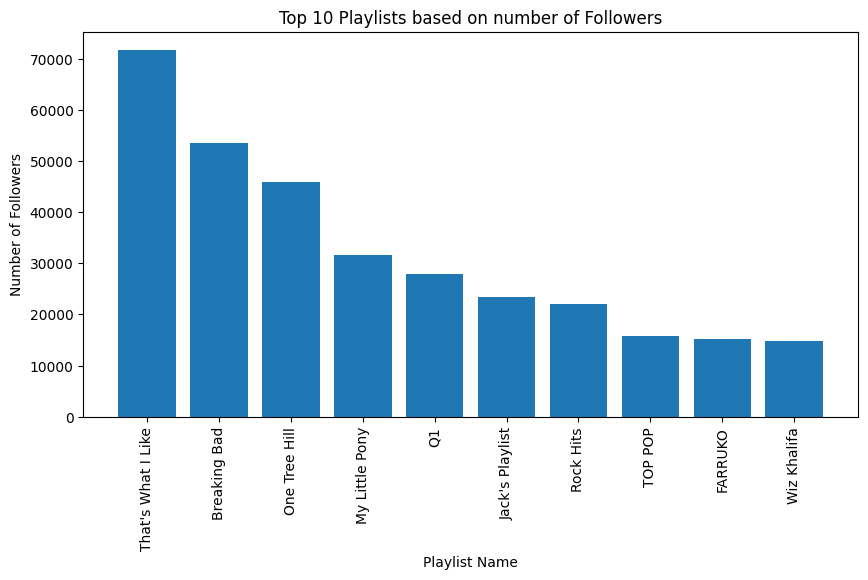

In [146]:

plt.figure(figsize=(10, 5))
plt.bar(top_10_playlists['name'], top_10_playlists['num_followers'])
plt.xlabel('Playlist Name')
plt.ylabel('Number of Followers')
plt.title('Top 10 Playlists based on number of Followers')
plt.xticks(rotation=90)
plt.show()



In [147]:
top_playlist = top_10_playlists.iloc[0]["pid"]
top_playlist

248269

In [148]:
# tracks in the top playlist
track_index = playlist_tracks_df[playlist_tracks_df['pid'] == top_playlist]['track_id']
track_index.count()

39

#### get the track info for the tracks in the top playlist

In [149]:

tracks_info = tracks_df[tracks_df['track_id'].isin(track_index)][['track_uri', 'track_name']]
tracks_info['track_id'] = tracks_info['track_uri'].apply(lambda x: x.split(':')[-1])
tracks_info

,track_uri,track_name,track_id
1641,spotify:track:5lXcSvHRVjQJ3LB2rLKQog,Superstition - Single Version,5lXcSvHRVjQJ3LB2rLKQog
1831,spotify:track:0sKlV58cODrjxGFOyf9IXY,The Way You Make Me Feel - 2012 Remaster,0sKlV58cODrjxGFOyf9IXY
1876,spotify:track:0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,0KKkJNfGyhkQ5aFogxQAPU
1899,spotify:track:6b8Be6ljOzmkOmFslEb23P,24K Magic,6b8Be6ljOzmkOmFslEb23P
1905,spotify:track:5GorFaKkP2mLREQvhSblIg,All My Life,5GorFaKkP2mLREQvhSblIg
2224,spotify:track:5wiu4PUC6CLNNbC48vqGOb,Celebration,5wiu4PUC6CLNNbC48vqGOb
2261,spotify:track:3koCCeSaVUyrRo3N2gHrd8,Let's Groove,3koCCeSaVUyrRo3N2gHrd8
2293,spotify:track:1OsCKwNZxph96EkNusILRy,Get Down On It - Single Version,1OsCKwNZxph96EkNusILRy
2303,spotify:track:0FWhGmPVxLI6jOVF0wjALa,Rapper's Delight,0FWhGmPVxLI6jOVF0wjALa
2336,spotify:track:1aWV3uY3SIEZVbmv45oFWS,Creep,1aWV3uY3SIEZVbmv45oFWS


#### Get audio features for the tracks in the top playlist

In [150]:
# Get audio features for the tracks in the top playlist
def fetch_audio_features(sp, track_name_df):
    playlist = track_name_df
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['id'],tracks_info[tracks_info['track_id'] == features['id']]["track_name"].values[0],
                              features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['track_id','track_name','danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    # df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_audio_features

In [151]:
# Get audio features for the tracks in the top playlist
track_audio_features = fetch_audio_features(sp, tracks_info)
track_audio_features.head()

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
5lXcSvHRVjQJ3LB2rLKQog,Superstition - Single Version,0.650,0.658,100.541,-10.908,0.883,0.0850,0.004030,0.0526,0.0887
0sKlV58cODrjxGFOyf9IXY,The Way You Make Me Feel - 2012 Remaster,0.877,0.854,114.472,-4.523,0.540,0.1470,0.000055,0.1440,0.0544
0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,0.853,0.560,134.066,-4.961,0.860,0.0406,0.000000,0.0944,0.0130
6b8Be6ljOzmkOmFslEb23P,24K Magic,0.818,0.803,106.970,-4.282,0.632,0.0797,0.000000,0.1530,0.0340
5GorFaKkP2mLREQvhSblIg,All My Life,0.629,0.511,128.038,-8.651,0.181,0.0326,0.000004,0.0588,0.1140


In [152]:
track_audio_features.describe()

,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.760487,0.649821,116.107410,-7.792769,0.682190,0.085795,0.003161,0.187882,0.150716
std,0.118858,0.162454,20.372807,3.146978,0.237641,0.082129,0.008500,0.211355,0.162214
min,0.485000,0.247000,65.004000,-16.588000,0.078400,0.024100,0.000000,0.034300,0.001950
25%,0.684000,0.533500,103.794500,-10.147000,0.553000,0.037600,0.000000,0.063000,0.031050
50%,0.777000,0.654000,115.020000,-8.245000,0.755000,0.048000,0.000004,0.111000,0.098400
75%,0.846500,0.798500,126.633500,-4.935000,0.858000,0.085950,0.000259,0.225000,0.222500
max,0.947000,0.903000,173.227000,-2.435000,0.968000,0.411000,0.039900,0.941000,0.717000


array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>]], dtype=object)

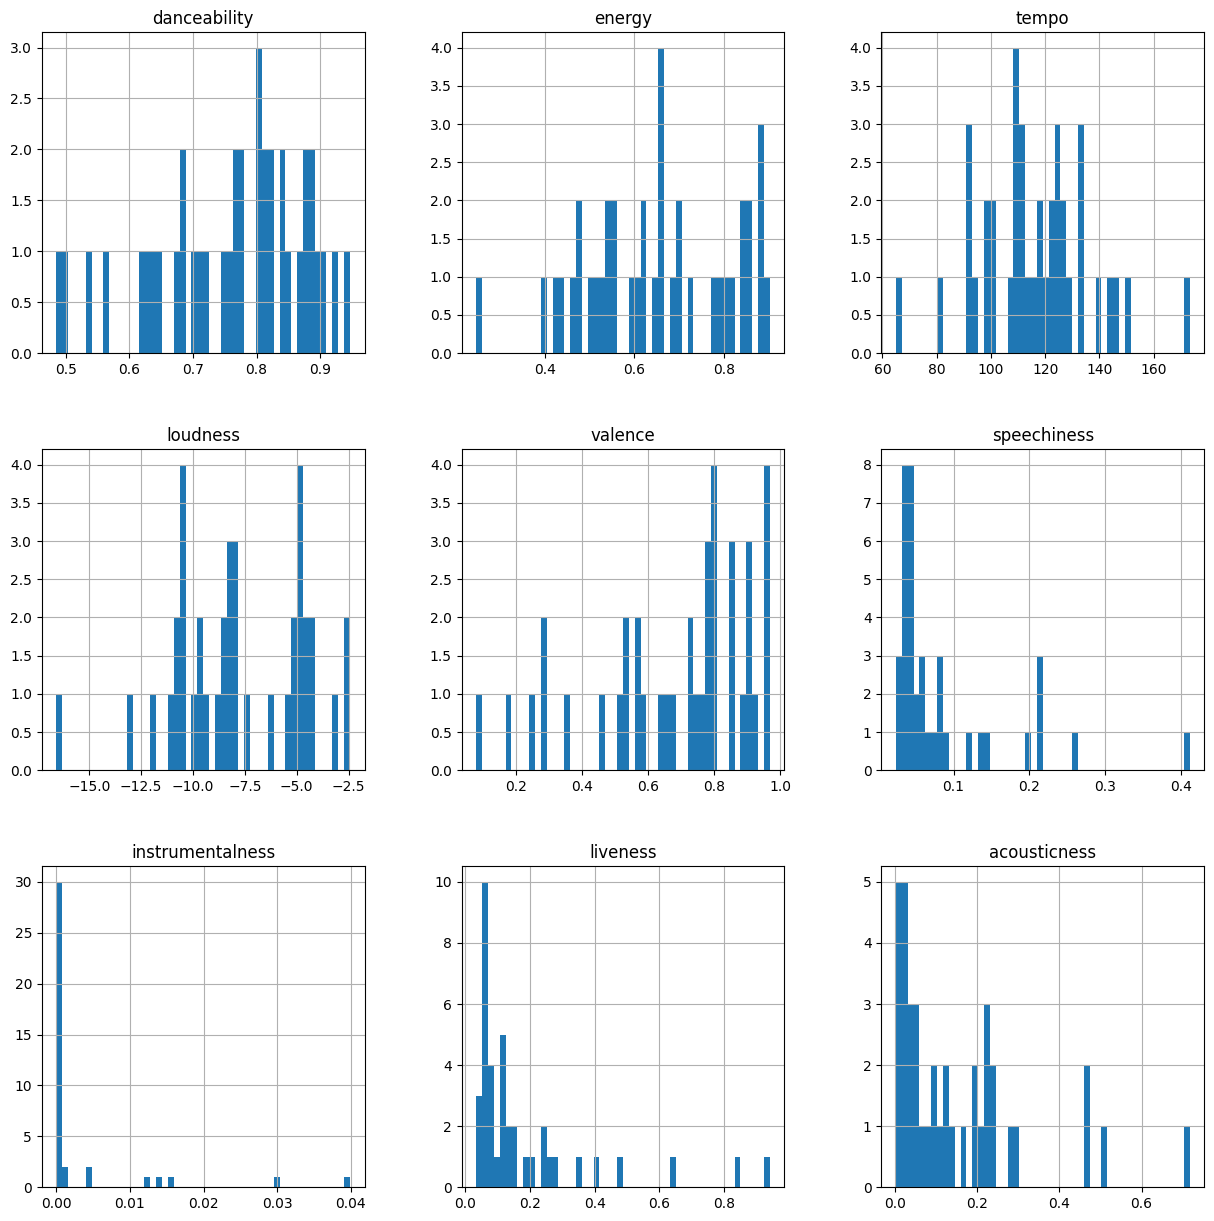

In [153]:
track_audio_features.hist(figsize=(15,15),bins=50)

# Which is the next similar song to play from the playlist?

In [154]:

def song_recommender(track_audio_features, song_name):
    song = track_audio_features[track_audio_features['track_name'] == song_name]
    song = song.drop('track_name', axis=1)
    song = song.to_numpy()
    song = song[0]

    track_audio_features_modified = track_audio_features
    track_audio_features_modified = track_audio_features_modified.drop('track_name', axis=1)

    track_audio_features_modified = track_audio_features_modified.to_numpy()
    track_audio_features = track_audio_features.to_numpy()

    cos_sim = cosine_similarity([song], track_audio_features_modified)
    # print(cos_sim)
    # # cosine similarity plot for the song
    # sns.heatmap(cos_sim, annot=True)
    # plt.show()

    cos_sim = cos_sim[0]

    top_10_similar_songs = cos_sim.argsort()[-10:][::-1]
    top_10_similar_songs = top_10_similar_songs.tolist()
    # print(top_10_similar_songs)

    similar_songs = []
    for song in top_10_similar_songs:
        similar_songs.append(track_audio_features[song][0])

    similar_songs = np.array(similar_songs)
    # return the top 10 similar songs with names
    return similar_songs

In [155]:
similar_songs = song_recommender(track_audio_features,'Talking To The Moon')
similar_songs = pd.DataFrame(similar_songs, columns=['track_name'])
similar_songs

,track_name
0,Talking To The Moon
1,Night by Night
2,Bacon
3,U Got It Bad
4,That's What I Like
5,The Way You Make Me Feel - 2012 Remaster
6,P.Y.T. (Pretty Young Thing)
7,Billie Jean
8,24K Magic
9,California Love - Original Version


# Reccommend next song to the playlist 

In [ ]:
# Reccommend next song to the playlist